In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
# Assuming the dataset is in CSV format after conversion from PDF
data = pd.read_excel('LaLiga_Matches_With_Attendance.xlsx')


# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head(10))

# Data Cleaning
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert date to datetime format
data = data.dropna()  # Drop rows with missing values

# Trend Analysis
# Extracting year from date for trend analysis
data.loc[:, 'Year'] = data['Date'].dt.year

# Calculate average goals per year
trend_data = data.groupby('Year').agg({'FTHG': 'mean', 'FTAG': 'mean'}).reset_index()

print("\nAverage Goals per Year:")
print(trend_data)

# Correlation Analysis
correlation_matrix = data[['FTHG', 'FTAG', 'Attendance']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

First few rows of the dataset:
    Season                 Date    HomeTeam     AwayTeam  FTHG  FTAG FTR  \
0  1995-96  1995-02-09 00:00:00   La Coruna     Valencia     3     0   H   
1  1995-96  1995-02-09 00:00:00    Sp Gijon     Albacete     3     0   H   
2  1995-96  1995-03-09 00:00:00  Ath Bilbao    Santander     4     0   H   
3  1995-96  1995-03-09 00:00:00  Ath Madrid     Sociedad     4     1   H   
4  1995-96  1995-03-09 00:00:00       Celta   Compostela     0     1   A   
5  1995-96  1995-03-09 00:00:00     Espanol    Salamanca     3     1   H   
6  1995-96  1995-03-09 00:00:00      Merida        Betis     1     1   D   
7  1995-96  1995-03-09 00:00:00     Sevilla     Tenerife     0     1   A   
8  1995-96  1995-03-09 00:00:00  Valladolid    Barcelona     0     2   A   
9  1995-96  1995-03-09 00:00:00   Vallecano  Real Madrid     1     5   A   

   HTHG  HTAG HTR Winning Team Losing Team  Attendance  
0   2.0   0.0   H    La Coruna    Valencia       25795  
1   3.0   0.0   H 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_excel('LaLiga_Matches_With_Attendance.xlsx')

# Data Cleaning
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert date to datetime format
data.dropna(inplace=True)  # Drop rows with missing values

# Feature Engineering
data['HomeWin'] = (data['FTR'] == 'H').astype(int)  # Binary target variable for home win

# Select features and target variable
features = data[['FTHG', 'FTAG', 'Attendance']]
target = data['HomeWin']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Decision Tree Model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree_model.predict(X_test_scaled)

# Random Forest Model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)
y_pred_forest = random_forest_model.predict(X_test_scaled)

# Evaluate Models
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

print("\nDecision Tree Results:")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_forest))
print("Accuracy:", accuracy_score(y_test, y_pred_forest))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1148
           1       1.00      1.00      1.00      1029

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

Accuracy: 1.0

Decision Tree Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1148
           1       1.00      1.00      1.00      1029

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

Accuracy: 1.0

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1148
           1       1.00      1.00      1.00      1029

    accuracy                           1.00      2177
   macro avg       1.00

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_excel('LaLiga_Matches_With_Attendance.xlsx')

# Data Cleaning
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert date to datetime format
data.dropna(inplace=True)  # Drop rows with missing values

# Initialize a list to hold team statistics
team_stats = []

# Calculate overall performance metrics for each team
for team in pd.concat([data['HomeTeam'], data['AwayTeam']]).unique():
    home_matches = data[data['HomeTeam'] == team]
    away_matches = data[data['AwayTeam'] == team]

    total_wins = (home_matches['FTR'] == 'H').sum() + (away_matches['FTR'] == 'A').sum()
    total_draws = (home_matches['FTR'] == 'D').sum() + (away_matches['FTR'] == 'D').sum()
    total_losses = (home_matches['FTR'] == 'A').sum() + (away_matches['FTR'] == 'H').sum()

    goals_scored = home_matches['FTHG'].sum() + away_matches['FTAG'].sum()
    goals_conceded = home_matches['FTAG'].sum() + away_matches['FTHG'].sum()

    # Append team statistics to the list
    team_stats.append({
        'Team': team,
        'Wins': total_wins,
        'Draws': total_draws,
        'Losses': total_losses,
        'Goals Scored': goals_scored,
        'Goals Conceded': goals_conceded,
        'Goal Difference': goals_scored - goals_conceded,
        'Total Matches': home_matches.shape[0] + away_matches.shape[0],
        'Win Rate (%)': (total_wins / (home_matches.shape[0] + away_matches.shape[0])) * 100
    })

# Create a DataFrame from the list of team statistics
teams = pd.DataFrame(team_stats)

# Display the team performance metrics
print("Team Performance Metrics:")
print(teams.sort_values(by='Wins', ascending=False).reset_index(drop=True))

Team Performance Metrics:
           Team  Wins  Draws  Losses  Goals Scored  Goals Conceded  \
0     Barcelona   698    214     168          2469            1028   
1   Real Madrid   690    203     187          2371            1131   
2    Ath Madrid   500    243     260          1609            1066   
3      Valencia   482    272     326          1621            1260   
4       Sevilla   418    230     317          1393            1191   
5    Ath Bilbao   395    305     379          1404            1416   
6      Sociedad   370    254     342          1316            1264   
7    Villarreal   356    220     268          1206            1011   
8       Espanol   337    283     414          1216            1392   
9         Betis   330    255     342          1175            1275   
10    La Coruna   302    227     276          1043            1030   
11        Celta   296    228     328          1096            1142   
12     Mallorca   260    178     292           910            10

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('Modified_La_Liga_Dataset_with_Titles.xlsx')

# Group by HomeTeam and calculate total titles, total goals (home and away), and total attendance (home and away)
team_stats = df.groupby('HomeTeam').agg(
    total_titles=('No of Titles', 'max'),  # max because each team has one entry for its titles
    total_goals_home=('FTHG', 'sum'),  # Home team goals
    total_attendance_home=('Attendance', 'sum')  # Home team attendance
).reset_index()

# Add away goals and away attendance
away_goals = df.groupby('AwayTeam').agg(
    total_goals_away=('FTAG', 'sum'),  # Away team goals
    total_attendance_away=('Attendance', 'sum')  # Away team attendance
).reset_index()

# Merge home and away stats into one dataframe
team_stats = pd.merge(team_stats, away_goals, left_on='HomeTeam', right_on='AwayTeam', how='left')

# Update total goals and total attendance
team_stats['total_goals'] = team_stats['total_goals_home'] + team_stats['total_goals_away']
team_stats['total_attendance'] = team_stats['total_attendance_home'] + team_stats['total_attendance_away']

# Sort teams by number of titles, goals scored, and total attendance
top_teams = team_stats.sort_values(by=['total_titles', 'total_goals', 'total_attendance'], ascending=False)

# Instead of using ace_tools, display the dataframe using pandas' display function
# or print the first few rows using head()
display(top_teams)
# Alternatively:
# print(top_teams.head())

,HomeTeam,total_titles,total_goals_home,total_attendance_home,AwayTeam,total_goals_away,total_attendance_away,total_goals,total_attendance
33,Real Madrid,36,1377,28885068,Real Madrid,994,29568731,2371,58453799
5,Barcelona,27,1428,29584386,Barcelona,1041,30459763,2469,60044149
41,Valencia,6,955,30307237,Valencia,666,29575479,1621,59882716
37,Sevilla,1,809,26416837,Sevilla,584,26218344,1393,52635181
4,Ath Madrid,0,939,27000501,Ath Madrid,670,27334957,1609,54335458
3,Ath Bilbao,0,818,29298274,Ath Bilbao,587,28273056,1405,57571330
38,Sociedad,0,766,27109396,Sociedad,550,26542671,1316,53652067
13,Espanol,0,715,28486580,Espanol,501,27338074,1216,55824654
45,Villarreal,0,705,23625451,Villarreal,501,22666632,1206,46292083
6,Betis,0,657,25877426,Betis,521,25870275,1178,51747701


from matplotlib import pyplot as plt
top_teams['total_titles'].plot(kind='hist', bins=20, title='total_titles')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_teams['total_goals_home'].plot(kind='hist', bins=20, title='total_goals_home')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_teams['total_attendance_home'].plot(kind='hist', bins=20, title='total_attendance_home')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_teams['total_goals_away'].plot(kind='hist', bins=20, title='total_goals_away')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_teams.plot(kind='scatter', x='total_titles', y='total_goals_home', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_teams.plot(kind='scatter', x='total_goals_home', y='total_attendance_home', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_teams.plot(kind='scatter', x='total_attendance_home', y='total_goals_away', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_teams.plot(kind='scatter', x='total_goals_away', y='total_attendance_away', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_teams['total_titles'].plot(kind='line', figsize=(8, 4), title='total_titles')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_teams['total_goals_home'].plot(kind='line', figsize=(8, 4), title='total_goals_home')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_teams['total_attendance_home'].plot(kind='line', figsize=(8, 4), title='total_attendance_home')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_teams['total_goals_away'].plot(kind='line', figsize=(8, 4), title='total_goals_away')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_excel('LaLiga_Matches_With_Attendance.xlsx')

# Data Cleaning
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert date to datetime format
data.dropna(inplace=True)  # Drop rows with missing values

# Extract season from the Date
data['Season'] = data['Date'].dt.year.astype(str) + '-' + (data['Date'].dt.year + 1).astype(str)

# Initialize a list to hold team statistics
all_team_stats = []

# Calculate overall performance metrics for each team per season
for season in data['Season'].unique():
    season_data = data[data['Season'] == season]

    for team in pd.concat([season_data['HomeTeam'], season_data['AwayTeam']]).unique():
        home_matches = season_data[season_data['HomeTeam'] == team]
        away_matches = season_data[season_data['AwayTeam'] == team]

        total_wins = (home_matches['FTR'] == 'H').sum() + (away_matches['FTR'] == 'A').sum()
        total_draws = (home_matches['FTR'] == 'D').sum() + (away_matches['FTR'] == 'D').sum()
        total_losses = (home_matches['FTR'] == 'A').sum() + (away_matches['FTR'] == 'H').sum()

        goals_scored = home_matches['FTHG'].sum() + away_matches['FTAG'].sum()
        goals_conceded = home_matches['FTAG'].sum() + away_matches['FTHG'].sum()

        # Append team statistics to the list
        all_team_stats.append({
            'Team': team,
            'Season': season,
            'Wins': total_wins,
            'Draws': total_draws,
            'Losses': total_losses,
            'Goals Scored': goals_scored,
            'Goals Conceded': goals_conceded,
            'Goal Difference': goals_scored - goals_conceded,
            'Total Matches': home_matches.shape[0] + away_matches.shape[0],
            'Win Rate (%)': (total_wins / (home_matches.shape[0] + away_matches.shape[0])) * 100
        })

# Create a DataFrame from the list of team statistics
teams_performance = pd.DataFrame(all_team_stats) # Create DataFrame outside the loop

# Display the aggregated team performance metrics
print("Team Performance Metrics Over Multiple Seasons:")
print(teams_performance.sort_values(by=['Season', 'Wins'], ascending=[True, False]).reset_index(drop=True))

Team Performance Metrics Over Multiple Seasons:
           Team     Season  Wins  Draws  Losses  Goals Scored  Goals Conceded  \
0    Ath Madrid  1995-1996    13      3       2            32               7   
1       Espanol  1995-1996    11      5       2            27              11   
2     Barcelona  1995-1996    10      5       3            37              16   
3    Compostela  1995-1996    10      3       5            25              21   
4      Valencia  1995-1996     9      3       6            30              24   
..          ...        ...   ...    ...     ...           ...             ...   
666  Valladolid  2023-2024     6      5      12            20              40   
667       Elche  2023-2024     5      6      12            20              34   
668  Las Palmas  2023-2024     2      2       4             4               7   
669      Alaves  2023-2024     2      1       5             6              12   
670     Granada  2023-2024     1      2       5            13

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset (assuming it has been converted from PDF to CSV)
data = pd.read_excel('LaLiga_Matches_With_Attendance.xlsx')

# Data Cleaning
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert date to datetime format
data.dropna(inplace=True)  # Drop rows with missing values

# Extract season from the Date
data['Season'] = data['Date'].dt.year.astype(str) + '-' + (data['Date'].dt.year + 1).astype(str)

# Calculate average goals and win rate for each team
team_stats = pd.DataFrame()

for team in pd.concat([data['HomeTeam'], data['AwayTeam']]).unique():
    home_matches = data[data['HomeTeam'] == team]
    away_matches = data[data['AwayTeam'] == team]

    total_goals_scored = home_matches['FTHG'].sum() + away_matches['FTAG'].sum()
    total_matches = home_matches.shape[0] + away_matches.shape[0]
    total_wins = (home_matches['FTR'] == 'H').sum() + (away_matches['FTR'] == 'A').sum()

    avg_goals_scored = total_goals_scored / total_matches if total_matches > 0 else 0
    win_rate = (total_wins / total_matches) * 100 if total_matches > 0 else 0

    # Use pd.concat instead of append
    team_stats = pd.concat([team_stats, pd.DataFrame([{
        'Team': team,
        'Avg Goals Scored': avg_goals_scored,
        'Win Rate (%)': win_rate
    }])], ignore_index=True)

# Prepare data for model training
X = team_stats[['Avg Goals Scored', 'Win Rate (%)']]
y = (team_stats['Win Rate (%)'] > 50).astype(int)  # Binary target: 1 if win rate > 50%, else 0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
data = pd.read_excel('LaLiga_Matches_With_Attendance.xlsx')  # Replace with your actual dataset path

# Step 2: Display the first few rows of the dataset
print(data.head())

# Step 3: Feature Engineering
# Convert categorical variables to numerical (e.g., HomeTeam and AwayTeam)
data['HomeTeam'] = data['HomeTeam'].astype('category').cat.codes
data['AwayTeam'] = data['AwayTeam'].astype('category').cat.codes

# Create a target variable: 1 for home win, 0 for draw, -1 for away win
data['Result'] = np.where(data['FTR'] == 'H', 1, np.where(data['FTR'] == 'D', 0, -1))

# Select features and target variable
features = data[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]  # Add more features as needed
target = data['Result']

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 5: Train the Model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Step 6: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 7: Predict Future Matches
# Example future matches DataFrame (replace with actual match data)
future_matches = pd.DataFrame({
    'HomeTeam': [1, 2],
    'AwayTeam': [3, 4],
    'FTHG': [1, 1],
    'FTAG': [1, 1]
})

# Predict outcomes for future matches
future_predictions = model.predict(future_matches)
print("Future Predictions (1: Home Win, 0: Draw, -1: Away Win):", future_predictions)  # Output will be 1 (home win), 0 (draw), -1 (away win)


    Season                 Date    HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  \
0  1995-96  1995-02-09 00:00:00   La Coruna    Valencia     3     0   H   2.0   
1  1995-96  1995-02-09 00:00:00    Sp Gijon    Albacete     3     0   H   3.0   
2  1995-96  1995-03-09 00:00:00  Ath Bilbao   Santander     4     0   H   2.0   
3  1995-96  1995-03-09 00:00:00  Ath Madrid    Sociedad     4     1   H   1.0   
4  1995-96  1995-03-09 00:00:00       Celta  Compostela     0     1   A   0.0   

   HTAG HTR Winning Team Losing Team  Attendance  
0   0.0   H    La Coruna    Valencia       25795  
1   0.0   H     Sp Gijon    Albacete       10860  
2   0.0   H   Ath Bilbao   Santander       86820  
3   1.0   D   Ath Madrid    Sociedad       64886  
4   0.0   D   Compostela       Celta       16265  
Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       613
           0       1.00      1.00      1.00       528
           1       1.00      1

Saving LaLiga_Matches_With_Attendance.xlsx to LaLiga_Matches_With_Attendance.xlsx


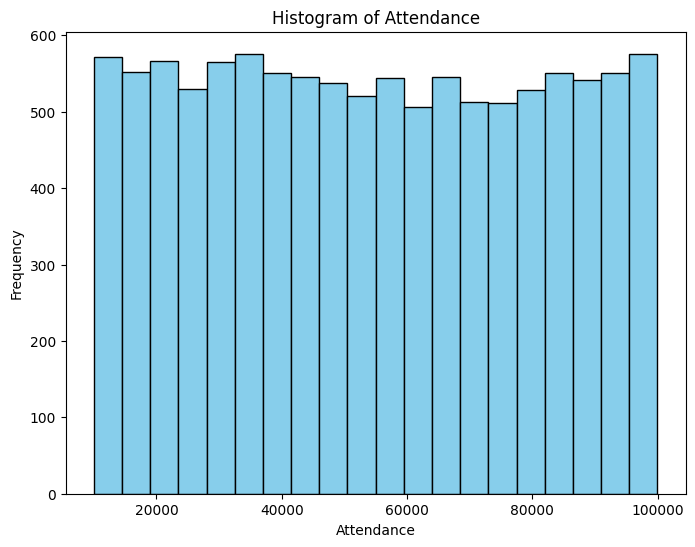

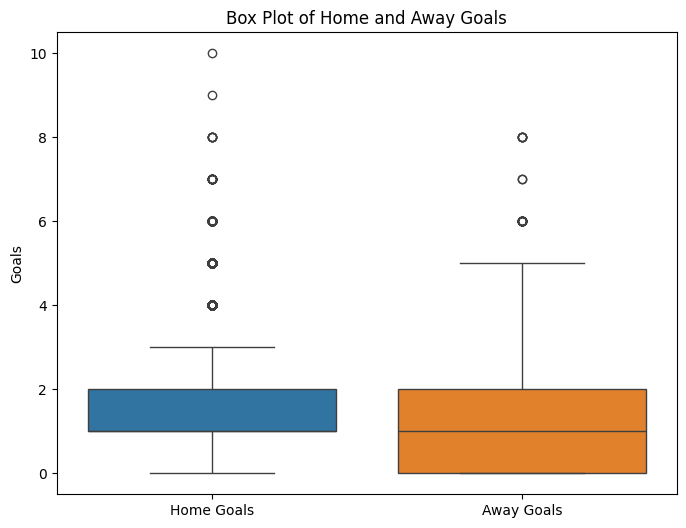

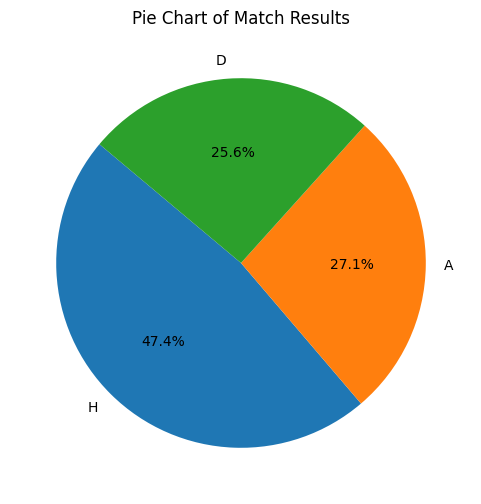

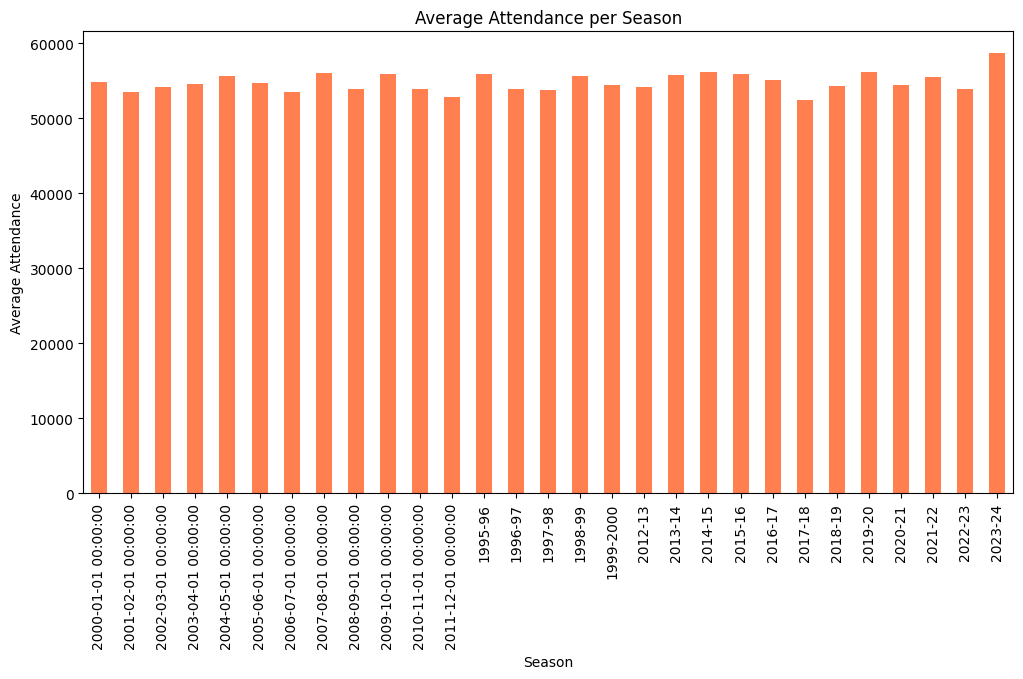

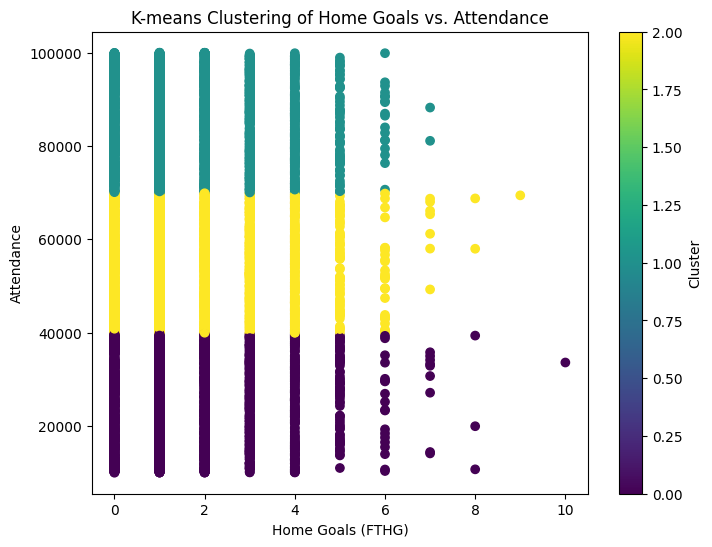

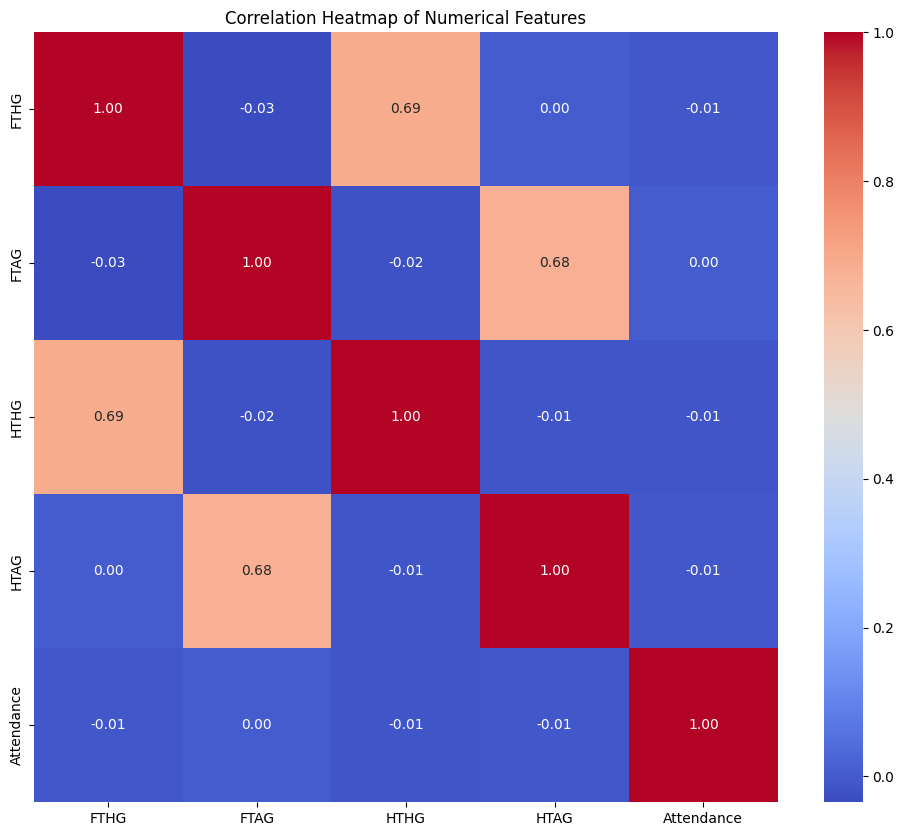

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans # Importing KMeans for clustering


# Upload the file
uploaded = files.upload()

# Load the file into a DataFrame
# Replace 'LaLiga_Matches_With_Attendance.xlsx' with the actual file name after uploading
df = pd.read_excel(next(iter(uploaded)))
df.head()


# 1. Histogram (Attendance)
plt.figure(figsize=(8, 6))
plt.hist(df['Attendance'].dropna(), bins=20, color='skyblue', edgecolor='black') # Changed 'data' to 'df'
plt.title('Histogram of Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plot (Home and Away Goals)
plt.figure(figsize=(8, 6))
sns.boxplot(data=[df['FTHG'].dropna(), df['FTAG'].dropna()])  # Changed 'data' to 'df'
plt.xticks([0, 1], ['Home Goals', 'Away Goals'])
plt.title('Box Plot of Home and Away Goals')
plt.ylabel('Goals')
plt.show()


# 4. Pie Chart (Match Results)
result_counts = df['FTR'].value_counts()  # Changed 'data' to 'df'
plt.figure(figsize=(6, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Match Results')
plt.show()

# 5. Bar Chart (Average Attendance per Season)
attendance_per_season = df.groupby('Season')['Attendance'].mean()  # Changed 'data' to 'df'
plt.figure(figsize=(12, 6))
attendance_per_season.plot(kind='bar', color='coral')
plt.title('Average Attendance per Season')
plt.xlabel('Season')
plt.ylabel('Average Attendance')
plt.show()

# K-means Clustering (Home Goals and Attendance)
# Defining clustering_data and performing KMeans clustering
clustering_data = df[['FTHG', 'Attendance']].dropna()  # Using 'df' instead of 'data'
kmeans = KMeans(n_clusters=3, random_state=0)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data[['FTHG', 'Attendance']])

plt.figure(figsize=(8, 6))
plt.scatter(clustering_data['FTHG'], clustering_data['Attendance'], c=clustering_data['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Home Goals vs. Attendance')
plt.xlabel('Home Goals (FTHG)')
plt.ylabel('Attendance')
plt.colorbar(label='Cluster')
plt.show()

# 7. Heatmap (Correlation of Numerical Features)
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()